[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_02/blob/master/M02_A-Data_Preparation_Lecture.ipynb)

In [78]:
import numpy as np
import pandas as pd

# reading a .csv
df = pd.read_csv('https://www.dropbox.com/s/uly87t2jwhbshtu/example1.csv?raw=1')

print(df)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


## First step of cleaning: Skip rows with known bad data
Or, use `comment="#"` to ignore commented lines

In [79]:
e4 = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1', skiprows=[0, 2, 3])
print(e4)
e4_1 = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1', comment="#")
print(e4_1)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo
   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


## Reading large files

We don't want all the data, say, from a 10TB data file, lets just get the first 15

In [80]:
pd.options.display.max_rows = 6
e6 = pd.read_csv('https://www.dropbox.com/s/ymn5eqkckz4h204/example6.csv?raw=1')
print(e6)

# Creating data cleaning algorithms for a small subset will not be perfect
e6_short = pd.read_csv('https://www.dropbox.com/s/ymn5eqkckz4h204/example6.csv?raw=1',nrows=10)
print(e6_short)

           one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
...        ...       ...       ...       ...  ..
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]
         one       two     three      four key
0   0.467976 -0.038649 -0.295344 -1.824726   L
1  -0.358893  1.404453  0.704965 -0.200638   B
2  -0.501840  0.659254 -0.421691 -0.057688   G
..       ...       ...       ...       ...  ..
7  -0.913135  1.530624 -0.572657  0.477252   K
8   0.358480 -0.497572 -0.367016  0.507702   S
9  -1.740877 -1.160417 -1.637830  2.172201   G

[10 rows x 5 columns]


## Reading chunks

In [85]:
read_chunk = pd.read_csv('https://www.dropbox.com/s/ymn5eqkckz4h204/example6.csv?raw=1', chunksize=1000)
total_dataset = pd.Series([])
for section in read_chunk:
  pd.options.display.max_rows = 10
  print(section)
  total_dataset = total_dataset.add(section['key'].value_counts(), fill_value=0)
print(total_dataset.shape)
print(total_dataset.sum())

          one       two     three      four key
0    0.467976 -0.038649 -0.295344 -1.824726   L
1   -0.358893  1.404453  0.704965 -0.200638   B
2   -0.501840  0.659254 -0.421691 -0.057688   G
3    0.204886  1.074134  1.388361 -0.982404   R
4    0.354628 -0.133116  0.283763 -0.837063   Q
..        ...       ...       ...       ...  ..
995  2.311896 -0.417070 -1.409599 -0.515821   M
996 -0.479893 -0.650419  0.745152 -0.646038   H
997  0.523331  0.787112  0.486066  1.093156   D
998 -0.362559  0.598894 -1.843201  0.887292   W
999 -0.096376 -1.012999 -0.657431 -0.573315   K

[1000 rows x 5 columns]
           one       two     three      four key
1000  0.467976 -0.038649 -0.295344 -1.824726   T
1001 -0.358893  1.404453  0.704965 -0.200638   J
1002 -0.501840  0.659254 -0.421691 -0.057688   R
1003  0.204886  1.074134  1.388361 -0.982404   S
1004  0.354628 -0.133116  0.283763 -0.837063   B
...        ...       ...       ...       ...  ..
1995  2.311896 -0.417070 -1.409599 -0.515821   L
1996 -0

## You got the data, what to do with it?

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


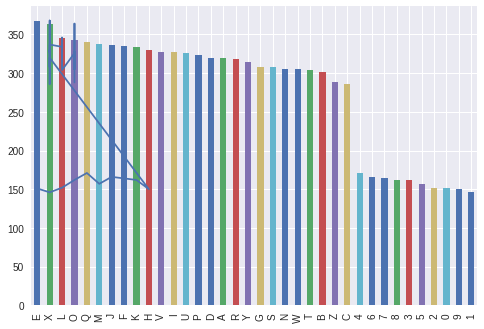

In [82]:
#total_dataset.index.values = np.vectorize(ord)(total_dataset.index.values)
sorted_array = total_dataset.sort_values(ascending=False)
print(sorted_array)
import matplotlib.pyplot as plt
#print(sorted_array.iloc[0:])
print(total_dataset.index.values)
plt.plot(total_dataset.index.values,total_dataset.values)
sorted_array.plot.bar()

## Accessing specific rows


In [112]:
result = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1', index_col='something')
print(result)

print(result[:10])

print(result[3:10])

print(result.loc[['one','two'],['a','b']])


           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo
           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo
Empty DataFrame
Columns: [a, b, c, d, message]
Index: []
           a  b
something      
one        1  2
two        5  6


## Treat and De-Duplicate


In [116]:
result = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1', index_col='something')

print(result)

           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo


In [114]:
print(result.isnull())

               a      b      c      d  message
something                                     
one        False  False  False  False     True
two        False  False   True  False    False
three      False  False  False  False    False


In [93]:
result.loc['one','message'] = 'blank'
print(result)

           a   b     c   d message
something                         
one        1   2   3.0   4   blank
two        5   6   NaN   8   world
three      9  10  11.0  12     foo


In [95]:
filled = result.fillna(0)
print(filled)

           a   b     c   d message
something                         
one        1   2   3.0   4   blank
two        5   6   0.0   8   world
three      9  10  11.0  12     foo


In [115]:
filled = result.fillna({'c': 1})
filled = filled.fillna({'message': 'blank'})
print(filled)
print(filled.isnull())

           a   b     c   d message
something                         
one        1   2   3.0   4   blank
two        5   6   1.0   8   world
three      9  10  11.0  12     foo
               a      b      c      d  message
something                                     
one        False  False  False  False    False
two        False  False  False  False    False
three      False  False  False  False    False


In [121]:
result = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1', index_col='something')

print(result)
filled = result.fillna(method = 'ffill')
print(filled)
filled = filled.fillna({'message': 'blank'})
print(filled)


           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo
           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   3.0   8   world
three      9  10  11.0  12     foo
           a   b     c   d message
something                         
one        1   2   3.0   4   blank
two        5   6   3.0   8   world
three      9  10  11.0  12     foo


In [122]:
result = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1', index_col='something')
print(result.isnull().sum())

a          0
b          0
c          1
d          0
message    1
dtype: int64


In [125]:
dropped = result.dropna()
print(dropped)
print(result.dropna(axis=1))
print(result.dropna(how="all"))

           a   b     c   d message
something                         
three      9  10  11.0  12     foo
           a   b   d
something           
one        1   2   4
two        5   6   8
three      9  10  12
           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo


## Removing Duplicates

In [127]:
DataFrame_obj = pd.DataFrame({'column 1': [4, 4, 5, 5, 6, 6, 6],
                  'column 2': ['x', 'x', 'y', 'y', 'z', 'z', 'z'],
                  'column 3': ['X', 'X', 'Y', 'Y', 'Z', 'Z', 'Z']})
DataFrame_obj

,column 1,column 2,column 3
0,4,x,X
1,4,x,X
2,5,y,Y
3,5,y,Y
4,6,z,Z
5,6,z,Z
6,6,z,Z


In [129]:
print(DataFrame_obj.duplicated())

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool


In [130]:
print(DataFrame_obj.drop_duplicates())

   column 1 column 2 column 3
0         4        x        X
2         5        y        Y
4         6        z        Z
